<a href="https://colab.research.google.com/github/soroushmosavati/MMAI/blob/NLP/20315945_Mosavati_Soroush_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 894 - Exercise 1
## Feedforward artificial neural network : Image classification
The goal of this excercise is to show you how to create your first neural network using the tensorflow/keras library. We will be using the MNIST dataset.

Submission instructions:
- You cannot edit this notebook directly. Save a copy to your drive, and make sure to identify yourself in the title using name and student number
- Do not insert new cells before the final one (titled "Further exploration")
- Verify that your notebook can _restart and run all_.
- Select File -> Download as .py (important! not as ipynb)
- Rename the file: `studentID_lastname_firstname_ex1.py`
- The mark will be assessed on the implementation of the functions with #TODO
- **Do not change anything outside the functions**  unless in the further exploration section
- The mark is not based on final accuracy - only on correctness
- Note: You do not have to answer the questions in the notebook as part of your submission. They are meant to guide you.

- You should not need to use any additional libraries other than the ones listed below. You may want to import additional modules from those libraries, however.

References
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/api/utils/python_utils/#to_categorical-function
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/models/model_training_apis/


### Libraries

In [ ]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
#import matplotlib
#matplotlib.use('agg')


### Data preparation

#### Import data

In [ ]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()

## Consider the following
- what shape is X?
- what value ranges does X take?
 - might this present a problem?
 - what transformations need to be applied?
- what shape is Y?
- what value ranges does Y take?
 - what transformations should be applied?

In [ ]:
def clean_data(raw_X, raw_Y):
    # TODO: clean, QA, and prep raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTIONthanks
    cleaned_X = keras.utils.normalize(raw_X, axis=-1 , order=2)
    cleaned_Y = keras.utils.to_categorical(raw_Y, num_classes=10, dtype="float32")

    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

In [ ]:
def split_data(cleaned_X, cleaned_Y):
    # TODO: split the data into validation, test, and train datasets
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    X_test, X_train, Y_test, Y_train= train_test_split(cleaned_X, cleaned_Y, test_size=0.50, random_state=0)
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.60, random_state=0)

    return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)
print(X_val.shape, X_test.shape, X_train.shape, Y_val.shape, Y_test.shape, Y_train.shape)

(14000, 784) (21000, 784) (35000, 784) (14000, 10) (21000, 10) (35000, 10)


#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You may use scikit-learn's train_test_split function.

#### [Optional]: plot your data with matplotlib
- Hint: you will need to reshape the row's data into a 28x28 matrix
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

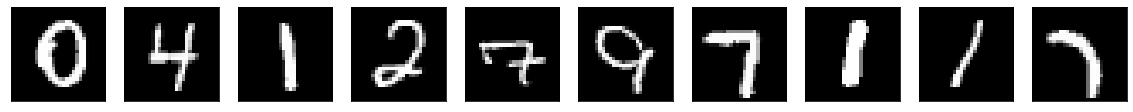

In [ ]:
def viz_data(X_train):
    # TODO: (optional) plot your data with matplotlib
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
      plt.figure(figsize=(20,20))
      for digits in range(0,10):
          plt.subplot(1,10,digits+1)
          grid = X_train.iloc[digits].to_numpy().reshape(28,28)
          plt.imshow(grid, interpolation = "none", cmap = "gray")
          plt.xticks([])
          plt.yticks([])
      plt.show()

viz_data(X_train)

### Model

#### Neural network structure
- For this network, we'll use 2 hidden layers
- Layer 1 should have 128 nodes, a dropout rate of 20%, and relu as its activation function
- Layer 2 should have 64 nodes, a dropout rate of 20%, and relu as its activation function
- The last layer should map back to the 10 possible MNIST class. Use softmax as the activation



In [ ]:
def build_model():
    # TODO: build the model,
    # HINT: you should have Total params: 109,386
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    model = keras.Sequential()
    model.add(keras.Input(shape=(784,)))
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

model = build_model()

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Model compilation

- what loss function should you use?
- Note your choice of optimizer
- Include accuracy as a metric (why are we using accuracy here?)

# Model training
- Use a batch size of 128, and train for 12 epochs
- Use verbose training, include validation data

More information: https://keras.io/api/models/model_training_apis/


In [ ]:
def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def train_model(model, X_train, Y_train, X_val, Y_val):
    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), verbose=1 , epochs=12 , batch_size=128)
    return model, history


model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)

Epoch 1/12
274/274 [==============================] - 7s 6ms/step - loss: 0.8664 - accuracy: 0.7520 - val_loss: 0.3340 - val_accuracy: 0.9041
Epoch 2/12
274/274 [==============================] - 1s 5ms/step - loss: 0.3593 - accuracy: 0.8931 - val_loss: 0.2471 - val_accuracy: 0.9270
Epoch 3/12
274/274 [==============================] - 1s 5ms/step - loss: 0.2787 - accuracy: 0.9185 - val_loss: 0.2001 - val_accuracy: 0.9412
Epoch 4/12
274/274 [==============================] - 1s 5ms/step - loss: 0.2338 - accuracy: 0.9306 - val_loss: 0.1719 - val_accuracy: 0.9486
Epoch 5/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1971 - accuracy: 0.9422 - val_loss: 0.1498 - val_accuracy: 0.9571
Epoch 6/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1731 - accuracy: 0.9487 - val_loss: 0.1353 - val_accuracy: 0.9608
Epoch 7/12
274/274 [==============================] - 2s 6ms/step - loss: 0.1583 - accuracy: 0.9528 - val_loss: 0.1250 - val_accuracy: 0.9639
Epoch 

# Model evaluation
- Show the performance on the test set
- What is the difference between "evaluate" and "predict"?
- Identify a few images the model classifies incorrectly. Any observations?

In [ ]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    score = model.evaluate(X_test, Y_test, verbose=1)
    test_accuracy=print('Test accuracy:', score[1])
    test_loss=print('Test loss:', score[0])

    return test_loss, test_accuracy

test_loss, test_accuracy = eval_model(model, X_test, Y_test)

print('Result:', test_loss, test_accuracy)

657/657 [==============================] - 2s 3ms/step - loss: 0.0946 - accuracy: 0.9716
Test accuracy: 0.9715714454650879
Test loss: 0.09455550462007523
Result: None None


Further exploration (Not evaluated)
Looking for something else  to do?
- Transform your code to do hyperparameter search.
- You can vary the number of nodes in the layers, the drop out rate, the optimizer and the parameters in Adam, the batch size, etc.


657/657 [==============================] - 1s 2ms/step
Predicted Number is: 8
Original Number is:


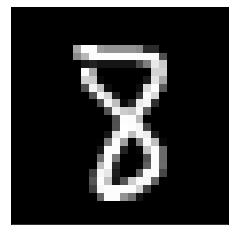

In [ ]:
#Printing a sample of prediction
from matplotlib.spines import np
Y_Predict = model.predict(X_test)
Y_Predict = np.argmax(Y_Predict, axis=1)
print("Predicted Number is:", Y_Predict[50])

print("Original Number is:")

Pred_grid = X_test.iloc[50].to_numpy().reshape(28,28)
plt.imshow(Pred_grid, interpolation = "none", cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
Y_test_rev= np.argmax(Y_test, axis=1)

print('')
print("List of incorrect prediction:")
print('')
incorrects = np.nonzero(Y_Predict.reshape((-1,)) != Y_test_rev)

print(incorrects)


List of incorrect prediction:

(array([   23,    41,    61,    98,   158,   187,   300,   338,   351,
         405,   508,   509,   539,   548,   571,   621,   622,   636,
         661,   679,   702,   784,   796,   808,   843,   894,   905,
         918,   933,   943,  1042,  1112,  1212,  1233,  1254,  1292,
        1330,  1384,  1394,  1399,  1415,  1510,  1537,  1556,  1565,
        1576,  1612,  1616,  1627,  1655,  1673,  1711,  1729,  1787,
        1805,  1819,  1880,  1908,  1985,  2074,  2099,  2106,  2120,
        2131,  2148,  2152,  2183,  2223,  2241,  2246,  2277,  2297,
        2421,  2501,  2533,  2559,  2571,  2627,  2648,  2651,  2730,
        2739,  2746,  2813,  2861,  2893,  2933,  2936,  2961,  2978,
        3020,  3049,  3071,  3076,  3085,  3111,  3131,  3178,  3192,
        3289,  3310,  3360,  3368,  3391,  3418,  3424,  3452,  3491,
        3754,  3821,  3845,  3868,  3914,  3975,  3991,  4018,  4070,
        4087,  4108,  4118,  4138,  4152,  4179,  4236,  

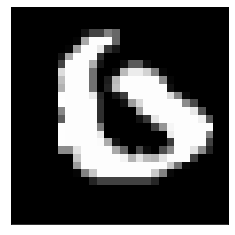


The predicted digit was:
6

The correct digit was:
0


In [ ]:
#Displaying a sample of incorrect prediction
Pred_grid = X_test.iloc[16515].to_numpy().reshape(28,28)
plt.imshow(Pred_grid, interpolation = "none", cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.show()
print('')
print("The predicted digit was:")
print(Y_Predict[16515])
print('')
print("The correct digit was:")
Y_Cor = Y_test[16515]
Y_Cor = np.argmax(Y_Cor, axis=0)
print(Y_Cor)
